## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

### Boston Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
boston = datasets.load_boston()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 2)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred_lr = regr.predict(x_test)

In [4]:
print(regr.coef_)

[-1.07664117e-01  3.88805682e-02 -1.48080103e-02  3.16030150e+00
 -1.66213766e+01  3.62698114e+00  9.41682017e-03 -1.38660922e+00
  3.23845819e-01 -1.16178216e-02 -1.03739550e+00  1.17010073e-02
 -5.59178684e-01]


In [5]:
print(f'MSE for linear regression: {mean_squared_error(y_test, y_pred_lr)}')

MSE for linear regression: 18.512131788427894


In [6]:
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x_train, y_train)
y_pred2 = lasso.predict(x_test)
print(lasso.coef_)
print(f'MSE for Lasso regression: {mean_squared_error(y_test, y_pred2)}')

[-0.06193097  0.04053005 -0.          0.         -0.          0.95541599
  0.02877938 -0.608265    0.27961537 -0.01458372 -0.78990477  0.01053463
 -0.79692367]
MSE for Lasso regression: 22.777489268124242


In [7]:
ridge = linear_model.Ridge(alpha = 1.0)
ridge.fit(x_train, y_train)
y_pred3 = ridge.predict(x_test)
print(ridge.coef_)
print(f'MSE for Ridge regression: {mean_squared_error(y_test, y_pred3)}')

[-1.05581591e-01  4.00446510e-02 -4.35927658e-02  2.99212634e+00
 -9.16820847e+00  3.66231566e+00  3.40932323e-03 -1.27751594e+00
  3.07392719e-01 -1.22689980e-02 -9.52005700e-01  1.21854510e-02
 -5.71822884e-01]
MSE for Ridge regression: 18.973188687503363


In [8]:
control = mean_squared_error(y_test, y_pred_lr)
MSE = []
varnum = np.logspace(-10, 1, num = 16)
for n in varnum: 
    lasso = linear_model.Lasso(alpha = n)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    MSE.append(mean_squared_error(y_test, y_pred))
print(MSE - control)

[9.70509006e-10 5.24793364e-09 2.84110051e-08 1.53787322e-07
 8.31718097e-07 4.50287145e-06 2.43773224e-05 1.31887506e-04
 7.15563209e-04 3.92185004e-03 2.25986147e-02 1.62969512e-01
 1.36613479e+00 1.57760330e+00 7.99701844e+00 1.52997750e+01]


[5.34257083e-11 2.88192581e-10 1.55874602e-09 8.43458636e-09
 4.56445193e-08 2.47013322e-07 1.33676061e-06 7.23415883e-06
 3.91496078e-05 2.11881700e-04 1.14710202e-03 6.22063782e-03
 3.39422351e-02 1.81822743e-01 6.91276478e-01 1.25187421e+00]


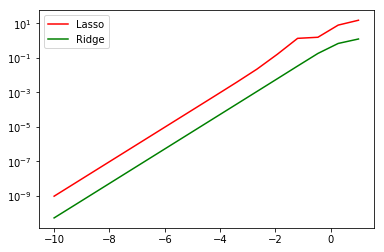

In [9]:
MSE2 = []
varnum = np.logspace(-10, 1, num = 16)
for n in varnum: 
    ridge = linear_model.Ridge(alpha = n)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    MSE2.append(mean_squared_error(y_test, y_pred))
print(MSE2 - control)
plt.plot(np.linspace(-10, 1, num = 16), MSE - control, color = 'red', label = 'Lasso')
plt.plot(np.linspace(-10, 1, num = 16), MSE2 - control, color = 'green', label = 'Ridge')
plt.yscale('log')
plt.legend()
plt.show()